In [119]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 기본 폰트 설정 / 계속된 오류로 코드 변경
# plt.rcParams['font.family'] = 'AppleGothic'  # 기본 폰트 설정 (macOS)
font_path = r"C:\Users\jm\AppData\Local\Microsoft\Windows\Fonts\NanumGothic.ttf"
fm.fontManager.addfont(font_path)                 # 폰트 등록
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rcParams["font.family"] = font_name           # 전체 기본 폰트로 지정
plt.rcParams["axes.unicode_minus"] = False

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 1️⃣ 문제 정의 및 데이터 이해

## 1-1. 컬럼 확인

📌 기본 고객 정보  
- State: 고객이 거주하는 주(State)  
- Account length: 계정 유지 기간 (보통 개월 또는 일 단위, 데이터셋 설명에 따라 다름)  
- Area code: 전화 지역번호  
- International plan: 국제전화 요금제 가입 여부 (Yes / No)  
- Voice mail plan: 음성 사서함(보이스메일) 서비스 가입 여부 (Yes / No)  
- Number vmail messages: 음성 사서함에 저장된 메시지 수  

☀️ 주간(Day) 사용 정보  
- Total day minutes: 주간 통화 총 사용 시간(분)
- Total day calls: 주간 통화 횟수  
- Total day charge: 주간 통화 요금  

🌆 저녁(Evening) 사용 정보  
- Total eve minutes: 저녁 통화 총 사용 시간(분)  
- Total eve calls: 저녁 통화 횟수  
- Total eve charge: 저녁 통화 요금  

🌙 야간(Night) 사용 정보  
- Total night minutes: 야간 통화 총 사용 시간(분)  
- Total night calls: 야간 통화 횟수  
- Total night charge: 야간 통화 요금  

🌍 국제전화 사용 정보  
- Total intl minutes: 국제전화 총 사용 시간(분)  
- Total intl calls: 국제전화 통화 횟수  
- Total intl charge: 국제전화 요금  

☎️ 고객 서비스 관련  
- Customer service calls: 고객센터에 전화한 횟수
- Churn : 고객 이탈 여부 (Yes → 이탈함 / No → 유지 중)

---

## 1-2. 자료 구조 파악

In [120]:
# Load
TRAIN_PATH = "churn-bigml-80.csv"
TEST_PATH  = "churn-bigml-20.csv"

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

# 데이터 크기 / 컬럼 확인
print("Train Shape (rows, cols):", train.shape)
display(train.head())

print("Test shape (rows, cols):", test.shape)
display(test.head())

print("\nColumns:\n", train.columns.tolist())

Train Shape (rows, cols): (2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Test shape (rows, cols): (667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False



Columns:
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']



[train] Churn counts:
Churn
False    2278
True      388
Name: count, dtype: int64

[train] Churn ratios:
Churn
False    0.8545
True     0.1455
Name: count, dtype: float64

[test] Churn counts:
Churn
False    572
True      95
Name: count, dtype: int64

[test] Churn ratios:
Churn
False    0.8576
True     0.1424
Name: count, dtype: float64


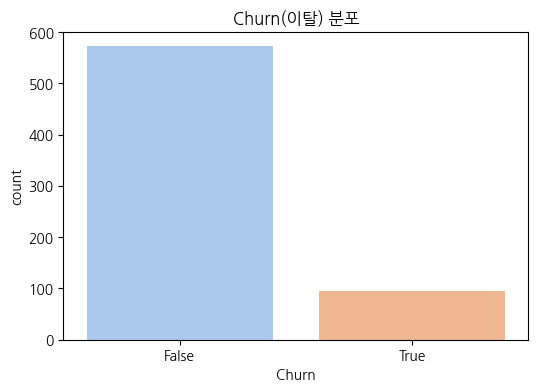

In [121]:
# 타겟(Churn) 분포 확인
for name, df in [("train", train), ("test", test)]:
    counts = df["Churn"].value_counts(dropna=False)
    ratios = (counts / len(df)).round(4)

    print(f"\n[{name}] Churn counts:\n{counts}")
    print(f"\n[{name}] Churn ratios:\n{ratios}")

# 타겟변수 시각화
plt.figure(figsize=(6,4))
sns.countplot(
    x="Churn",
    hue="Churn",
    data=df,
    palette="pastel",
    legend=False)

plt.title("Churn(이탈) 분포")
plt.show()

#### ✔️ 데이터 크기
- 고객 수: (Train) 2,666명 / (Test) 667명  
- 변수 수: 20개  
- 문제 유형: 이진 분류 (Churn: True / False)  

#### ✔️ 타겟 변수 (Churn)
- 타입: bool (True = 이탈)  

👉 Train & Test의 True 비율이 약 14%로 유사 (stratified split이 잘 됨)  
👉 명확한 클래스 불균형이 존재  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(Accuracy보다는 PR-AUC, Recall, F1 지표를 중심으로 모델을 평가)  

In [122]:
def light_eda(df, name="df"):
    print(f"\n============= {name} =============")
    print("shape:", df.shape)
    print("\nDtypes:\n", df.dtypes)

    # 결측치
    na = df.isna().sum().sort_values(ascending=False)
    print("\nMissing values (top 15):\n", na.head(15))

    # 범주형/수치형 분리
    cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()
    num_cols = [c for c in df.columns if c not in cat_cols]

    print("\nCategorical columns:", cat_cols)
    print("Numeric columns:", num_cols)

    # 수치형 요약통계
    print("\nNumeric describe:\n", df[num_cols].describe().T)

    # 범주형 상위 빈도
    for c in cat_cols:
        print(f"\n[{c}] unique={df[c].nunique()}")
        print(df[c].value_counts().head(10))

light_eda(train, "train")



============= train =============
shape: (2666, 20)

Dtypes:
 State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

Missing values (top 15):
 State                     0
Account length            0
Customer service calls    0
Total intl charge         0
Total intl calls          0
Total intl minutes        0
Total night charge        0
Total night calls   

#### ✔️ 결측치
- 모든 컬럼 결측치 없음
👉 별도의 결측치 처리 불필요  

#### ✔️ 데이터 타입
🔤 범주형 변수 (Categorical)  
     `State`: 고객이 거주하는 주(State)  
     `International plan`: 국제전화 요금제 가입 여부 (Yes / No)  
     `Voice mail plan`: 음성 사서함(보이스메일) 서비스 가입 여부 (Yes / No)  
     `Churn` : 고객 이탈 여부 (True / False)

🔢 수치형 변수 (Numerical)  
     ① 고객 특성 :  
     `Account length`, `Customer service calls`  
     ② 사용량/요금 (Day / Eve / Night / Intl) :  
     `minutes` / `calls` / `charge` 세트 구조

#### ✔️ `State`
- 51개 주  
- 주(state)별 분포 고름  

#### ✔️ `International plan`  
- Yes: 270 (10%)  
- No : 2396 (90%)  
👉 이탈(Churn)과 연관 가능성 확인 필요  

#### ✔️ `Voice mail plan`  
- Yes: 733  
- No : 1933  
👉 보이스메일 서비스 이용 고객 비중이 일정 수준 존재  
👉 이탈 여부 및 사용 패턴과의 관계 추가 확인 필요  

#### ✔️ `Account length`  
- mean ≈ 100개월  
- median = 100개월  
👉 단기 가입 고객부터 장기 이용 고객까지 고르게 분포  
👉 고객과 서비스 간의 관계 지속성을 나타내는 변수로  
단독 요인보다는 Customer service calls, 요금제(International plan), 통화 사용 패턴과 결합되어  
이탈 위험을 완화하거나 증폭시키는 보조적 설명 변수로 활용  

#### ✔️ `Customer service calls`  
- mean = 1.56  
- max = 9  
👉 분산 큼(횟수에 따른 이탈률 확인 필요)  
👉 threshold 기반 파생변수 사용  
👉 이탈 예측뿐 아니라, 사전 고객 케어 타겟팅 변수로도 활용 가능  

#### ✔️ `Charge` vs `Minutes`
- `Total day minutes` ↔ `Total day charge`  
- `Total intl minutes` ↔ `Total intl charge`  
👉 거의 완벽한 선형 관계  
👉 다중공선성 주의  

#### ✔️ 국제 통화
- Total intl minutes mean ≈ 10  
- Total intl calls mean ≈ 4.5  
👉 국제 통화 사용량은 전체 평균 기준 낮은 편이며,  
   International plan 가입 여부에 따른 사용 패턴 차이 확인 필요

---

## 1-3. EDA를 위한 질문 리스트

> Q1. 이탈 고객은 어떤 고객 서비스 행동을 보이는가?  
- 변수: `Customer service calls`  
- 체크:  
    - CS 호출 횟수가 많을수록 이탈률이 증가하는가?  
    - 특정 임계점이 존재하는가?  

> Q2. 국제 요금제 가입 여부는 이탈에 영향을 미치는가?  
- 변수: `International plan`  
- 체크:  
    - 국제 요금제 가입자의 이탈률은 비가입자보다 높은가?  

> Q3. 통화 사용량/요금이 높은 고객은 더 이탈하는가?  
- 변수:  
    `Total day minutes / charge`  
    `Total eve minutes / charge`  
    `Total night minutes / charge`  
- 체크:  
    - 사용량이 높은 고객이 불만으로 이탈하는가?  
    - 아니면 사용량이 낮아지며 이탈하는가?  

> Q4. Voice mail plan과 실제 사용량은 이탈과 어떤 관계인가?  
- 변수:  
    `Voice mail plan`  
    `Number vmail messages`  
- 체크: 
    - 음성사서함 미가입 + 사용량 0 고객의 이탈률은?  

> Q5. State(지역)별 이탈률 차이가 존재하는가?  
- 변수: `State`  
- 체크:  
    - 주별 이탈률 편차가 존재하는가?  

> Q6. 요금(charge)과 사용량(minutes)은 얼마나 강하게 연결돼 있는가?  
- 체크:  
    - 다중공선성이 존재하는가?  

> Q7. 통화 횟수(calls) vs 통화 시간(minutes)의 역할은 다른가?  
- 체크:  
    - “짧은 통화를 많이 하는 고객”과  
    “긴 통화를 적게 하는 고객”의 이탈 패턴은?  

> Q8. 가입 기간(Account length)과 고객 서비스 호출(Customer service calls)는 관련이 있는가?  
- 변수:  
    `Account length`  
    `Customer service calls`
- 체크:  
    - 가입 기간에 따라 고객 서비스 호출이 이탈에 영향을 미치는가? 

---

## 1-4. 목표 정의

- 비즈니스 목표: “이탈 고위험 고객을 선제적으로 식별해 유지 전략을 실행”  

- 분석 목표: “이탈 영향 요인 파악 + 예측 모델 구축(일반화 성능 확인)”  

- 핵심 지표: Recall(Churn=True), PR-AUC, F1 (불균형 데이터이므로)

<br>
cf.

|지표|의미|
|---|---|
|Recall (Churn=True)|실제 이탈 고객을 얼마나 놓치지 않았는가|
|PR-AUC|불균형 데이터에서 이탈 고객을 전반적으로 얼마나 잘 구분하는가|
|F1 Score|이탈을 잡는 능력과 과도한 오탐 사이의 균형|

---

# 2️⃣ 전처리(Preprocessing)

- 결측치: 위에서 없음을 확인 (제외)  
- 이상값 탐지 및 처리  
- 데이터 타입 변환

In [123]:
# 이상값 탐지 및 처리
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierClipper(BaseEstimator, TransformerMixin):
    """
    Fit 때 numeric feature별 분위수 경계를 학습하고,
    Transform 때 그 범위를 벗어난 값을 clip(윈저라이징)합니다.
    """
    def __init__(self, lower_q=0.01, upper_q=0.99):
        self.lower_q = lower_q
        self.upper_q = upper_q

    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        self.lower_ = np.nanquantile(X, self.lower_q, axis=0)
        self.upper_ = np.nanquantile(X, self.upper_q, axis=0)
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lower_, self.upper_)

# ----------------------

from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 타겟 정규화: bool -> int (True=1, False=0)
train["Churn"] = train["Churn"].astype(int)
test["Churn"]  = test["Churn"].astype(int)

# X/y 분리
X_train = train.drop(columns=["Churn"])
y_train = train["Churn"]
X_test  = test.drop(columns=["Churn"])
y_test  = test["Churn"]

# 범주형/수치형 컬럼 자동 분리
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_train.columns if c not in cat_cols]

# 수치형 전처리 파이프라인
numeric_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# 범주형 전처리 파이프라인
categorical_tf = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# 수치 행렬로 변환; 수치형 - numeric_tf / 범주형 - categorical_tf 적용
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_tf, num_cols),
        ("cat", categorical_tf, cat_cols)
    ]
)

---

# 3️⃣ EDA

## Q1. 이탈 고객은 어떤 고객 서비스 행동을 보이는가?  

- 변수: `Customer service calls`  

,count,churn_rate
cs_bin,,
0-1,1500,0.119
2-3,956,0.104
4+,210,0.529


<Figure size 640x480 with 0 Axes>

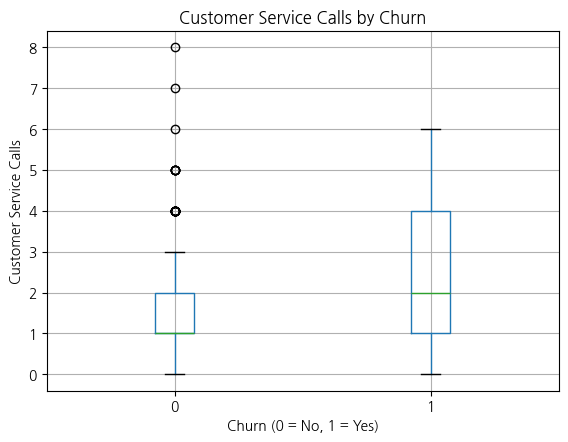

In [124]:
# 호출 횟수 구간화 후 이탈률 비교 (정량적 확인)
tmp = train[["Customer service calls", "Churn"]].copy()
# calls를 구간화(예시)
tmp["cs_bin"] = pd.cut(tmp["Customer service calls"],
                       bins=[-1,1,3,100],
                       labels=["0-1","2-3","4+"])

rate = tmp.groupby("cs_bin")["Churn"].mean().sort_index()
count = tmp["cs_bin"].value_counts().sort_index()

display(pd.DataFrame({"count": count, "churn_rate": rate.round(3)}))

# Churn별 박스플롯
df["Churn"] = df["Churn"].astype(int)

plt.figure()
df.boxplot(column="Customer service calls", by="Churn")
plt.title("Customer Service Calls by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Customer Service Calls")
plt.show()

**< 호출 횟수에 따른 이탈률 수치 >**
- 고객센터 호출이 4회 이상인 고객은 절반 이상이 이탈    

**< 박스플롯 >**
- 이탈 고객(Churn=1)의 중앙값(median)이 비이탈 고객보다 높고, 박스 폭도 훨씬 큼  
    → 이탈 고객은 고객센터 호출이 전반적으로 더 많고, 분포도 더 넓음  

- 비이탈 고객(Churn=0) 쪽에서 상단 이상치(outlier)가 훨씬 많음  
    → 비이탈 고객은 대부분 0~3회에 몰려 있어서 4회 이상이 “이상치처럼” 보임  

👉 임계점(threshold) : 4회 / "불만이 누적되어 행동으로 전환되는 지점"  

**<span style="background-color: #000000;">
📌 고객센터 호출 횟수가 4회 이상인 고객의 이탈률은 약 53%로, 3회 이하 고객 대비 약 5배 높게 나타났다.  
📌 이는 고객 불만 누적이 이탈로 직결됨을 시사한다.
</span>**

---

## Q2. 국제 요금제 가입 여부는 이탈에 영향을 미치는가?  
- 변수: `International plan`  

Churn                   0      1
International plan              
No                  0.887  0.113
Yes                 0.563  0.437

Churn rate by International plan:
 International plan
No     0.113
Yes    0.437
Name: Churn, dtype: float64


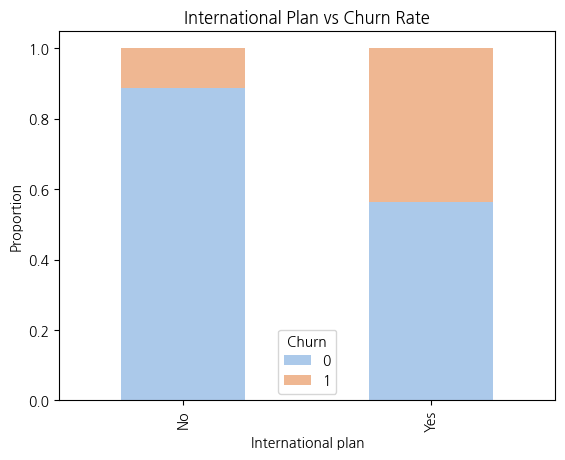

In [125]:
ct = pd.crosstab(train["International plan"], train["Churn"], normalize="index")
print(ct.round(3))

# 이탈률만 보기
rate_intl = train.groupby("International plan")["Churn"].mean()
print("\nChurn rate by International plan:\n", rate_intl.round(3))

# 국제 요금제 가입 여부에 따른 이탈률 시각화
ct.plot(
    kind="bar",
    stacked=True,
    color=["#ABC9EA", "#EFB792"]  # [False, True] 순서
)

plt.title("International Plan vs Churn Rate")
plt.ylabel("Proportion")
plt.legend(title="Churn")
plt.show()

- International plan = No  
    유지(0): 88.7%  
    이탈(1): 11.3%  

- International plan = Yes  
    유지(0): 56.3%  
    이탈(1): 43.7%  

**<span style="background-color: #000000;">
📌 국제전화 요금제 가입 고객은 미가입 고객 대비 이탈 위험이 약 3.9배로,  
국제전화 요금제 가입 고객의 이탈률이 매우 높음을 확인할 수 있다. (유의성이 매우 높음)</span>**  
$$
\frac{0.437}{ 0.113} ≈3.87
$$

👉 국제전화 요금제 가입 여부와 고객 이탈 간에 연관성이 존재할 가능성이 관찰됨에 따라,  
👉 두 변수가 서로 독립이라는 귀무가설을 검정하기 위해 카이제곱 독립성 검정을 추가로 수행

#### ✔️ `International plan` 독립성 검정

$H_0$ (귀무가설) : `International plan`과 `Churn`은 서로 독립이다  
$H_1$ (대립가설) : 두 변수는 독립이 아니다 / 관계가 있다

In [126]:
from scipy.stats import chi2_contingency

ct_2 = pd.crosstab(train["International plan"], train["Churn"])

chi2, p_value, dof, expected = chi2_contingency(ct_2)

print("\nChi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("\nExpected frequencies:\n", expected)

# 얼마나 강한 관계인지 추가 확인
n = ct_2.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(ct_2.shape) - 1)))
print("\nCramér’s V:\n", cramers_v)


Chi-square statistic: 202.682107174188
p-value: 5.4269405491147075e-46
Degrees of freedom: 1

Expected frequencies:
 [[2047.29482371  348.70517629]
 [ 230.70517629   39.29482371]]

Cramér’s V:
 0.2757259443531164


- p-value $≈ 5.43 × {10^{-4}}^{6} < 0.05$  
→ p값이 사실상 에 수렴하므로, 귀무가설을 강하게 기각함  

- Expected:  
     No-plan  & Churn=1 → 348.7 명 (실제 데이터 270 명)  
     Yes-plan & Churn=1 →  39.3 명 (실제 데이터 118 명)  
      $$
      \frac{118}{39.3} ≈ 3.0
      $$  

- Cramér’s V = 0.276  
     0.276 ≈ 중간(moderate) 수준의 연관성  

**<span style="background-color: #000000;">
📌 International plan 가입 여부와 고객 이탈은 통계적으로 상당한 연관성이 있음을 확인했다.  
📌 특히, 국제전화 요금제 가입 고객은 독립 가정하에서  
기대되는 이탈 고객 수보다 약 3배 이상 많이 이탈하고 있는 것으로 나타났다.</span>**  

> <small>cf. Cramér’s V 해석 기준
> - 0.1 : 약함
> - 0.3 : 중간
> - 0.5 : 강함</small>

---

## Q3. 통화 사용량/요금이 높은 고객은 더 이탈하는가?

- 변수:  
    `Total day minutes / charge`  
    `Total eve minutes / charge`  
    `Total night minutes / charge` 

In [127]:
features = [
    "Total day minutes","Total day charge",
    "Total eve minutes","Total eve charge",
    "Total night minutes","Total night charge",
    "Total intl minutes","Total intl charge"
]

summary = train.groupby("Churn")[features].mean().T
summary.columns = ["NonChurn_mean", "Churn_mean"]
summary["diff"] = summary["Churn_mean"] - summary["NonChurn_mean"]
summary.round(3)

,NonChurn_mean,Churn_mean,diff
Total day minutes,175.104,205.181,30.077
Total day charge,29.768,34.881,5.113
Total eve minutes,198.853,209.385,10.532
Total eve charge,16.903,17.798,0.895
Total night minutes,200.464,205.307,4.843
Total night charge,9.021,9.239,0.218
Total intl minutes,10.138,10.819,0.681
Total intl charge,2.738,2.922,0.184


- 모든 시간대에서 이탈 고객 평균 사용량이 더 높음  
- 차이 크기: Day > Eve > Night  
- 특히 Day usage/charge 차이가 압도적  

👉 사용량이 많은 고객이 요금 또는 서비스에 대한 불만으로 이탈할 가능성이 더 높다는 가설이 타당해 보임

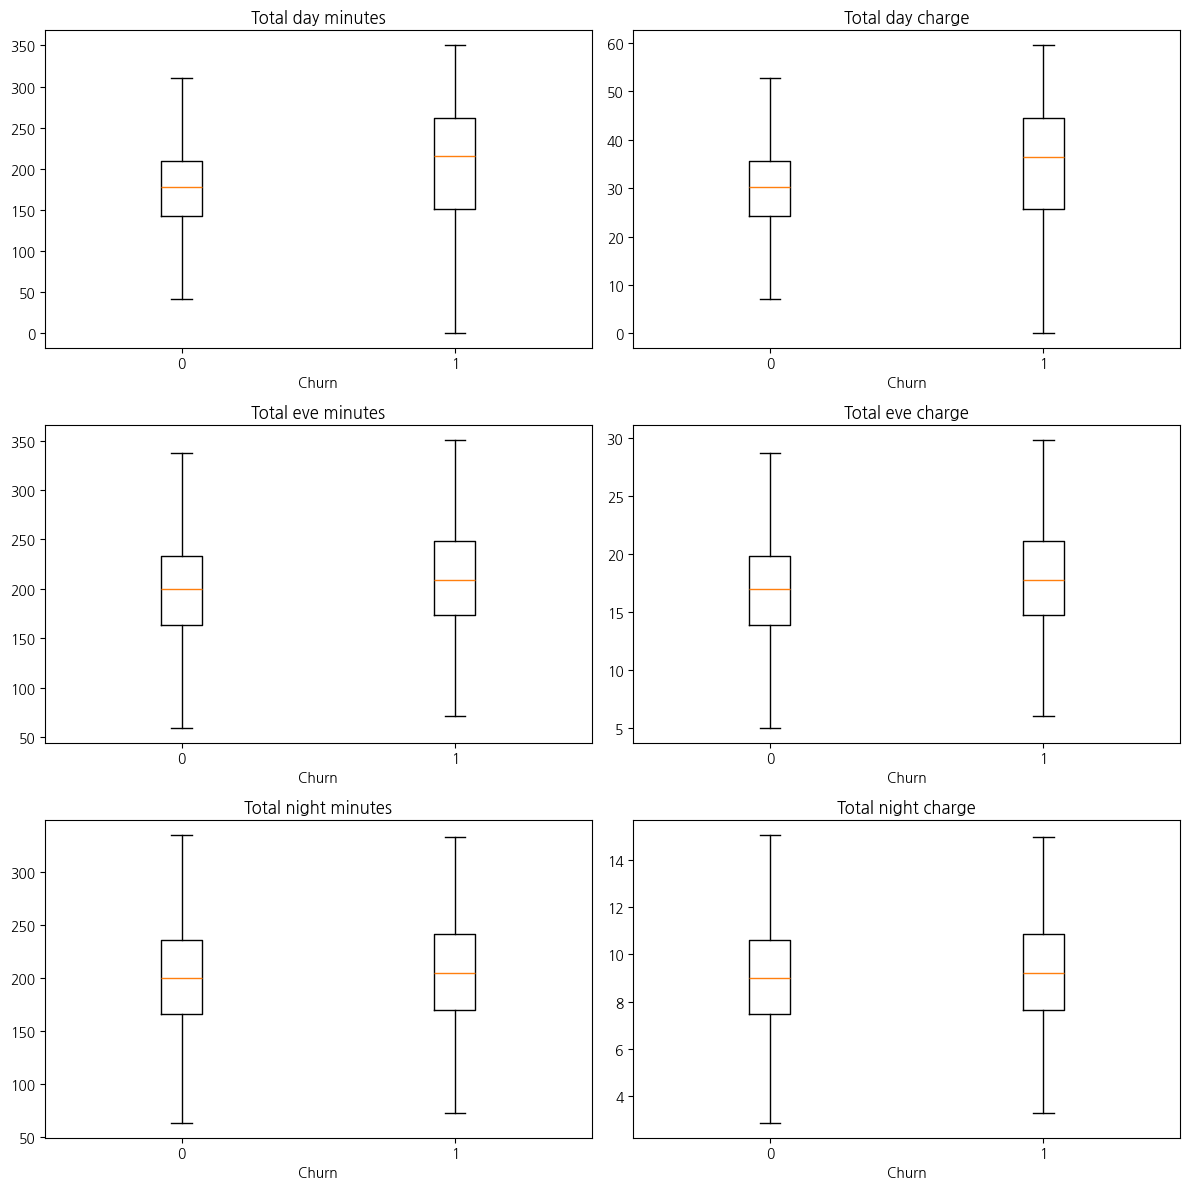

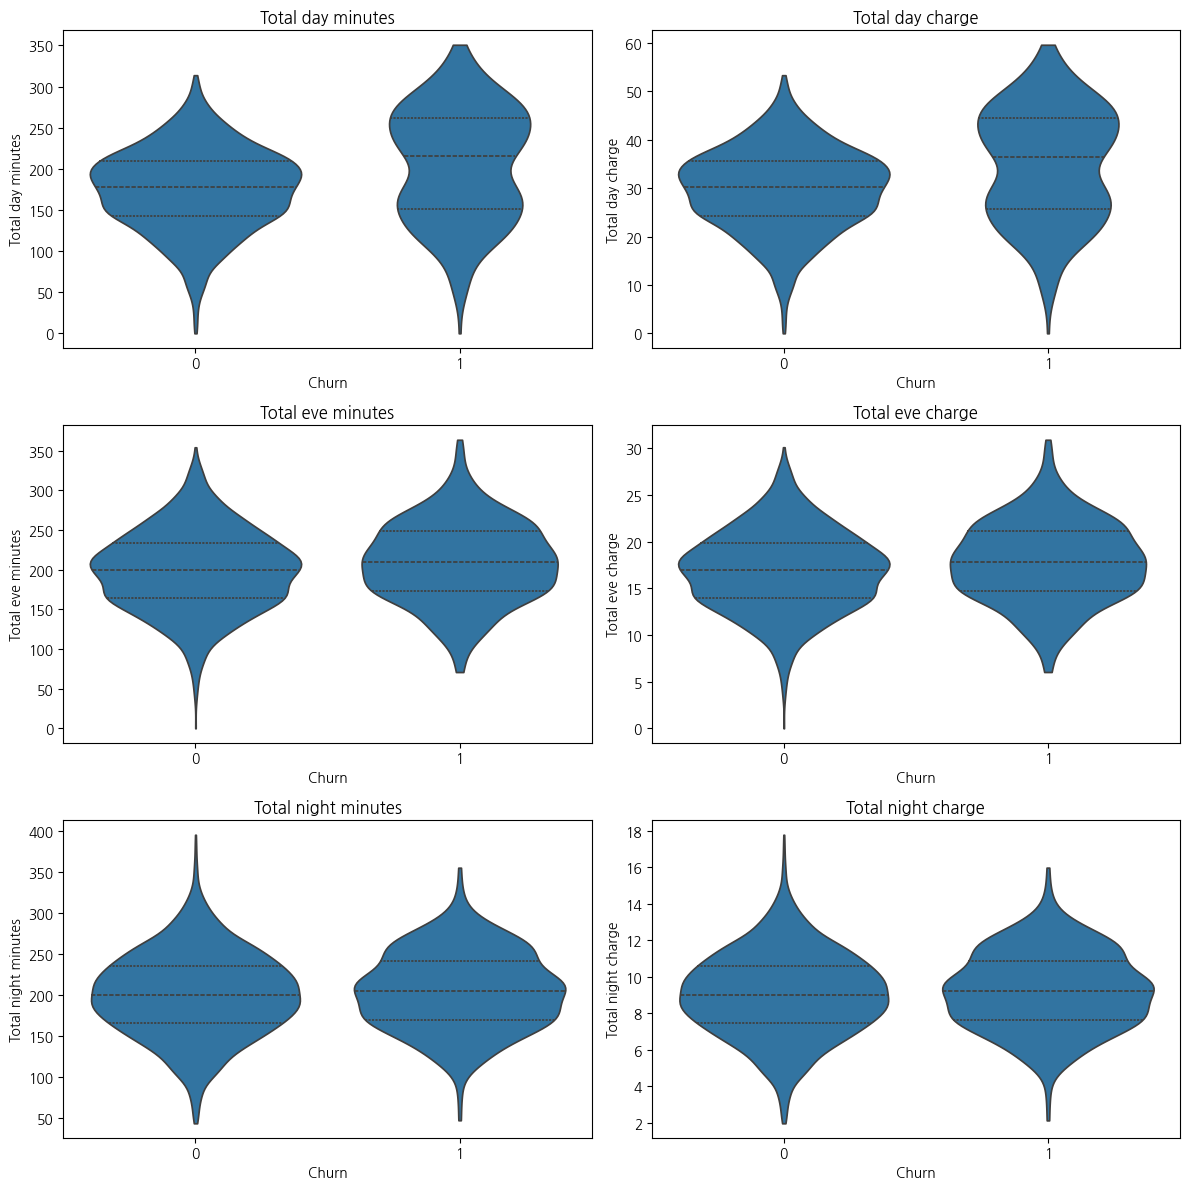

In [128]:
import math

cols = [
    "Total day minutes", "Total day charge",
    "Total eve minutes", "Total eve charge",
    "Total night minutes", "Total night charge"
]

df = train.copy()  # train 기준 시각화

n = len(cols)
rows = math.ceil(n / 2)

plt.figure(figsize=(12, 4 * rows))
for i, c in enumerate(cols, 1):
    plt.subplot(rows, 2, i)
    g0 = df.loc[df["Churn"] == 0, c].dropna()
    g1 = df.loc[df["Churn"] == 1, c].dropna()
    plt.boxplot([g0, g1], labels=["0", "1"], showfliers=False)
    plt.title(c)
    plt.xlabel("Churn")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4 * rows))
for i, c in enumerate(cols, 1):
    plt.subplot(rows, 2, i)
    sns.violinplot(data=df, x="Churn", y=c, inner="quartile", cut=0)
    plt.title(c)
plt.tight_layout()
plt.show()

- 이탈 고객(Churn=1)의 중앙값(median)이 확실히 더 높음  
- IQR(박스 자체)도 위쪽으로 이동  
- 상위 꼬리(heavy user)가 이탈 고객 쪽에 더 많이 존재  
👉 고사용량 고객군에서 이탈 집중  

- Day / Eve: Churn=1 분포가 전체적으로 위쪽에 밀집  
👉 단순한 극단치(outlier) 때문이 아님  
👉 평균 차이가 소수의 이상치 때문이 아니라, 분포 전반의 이동  

- Night: 두 그룹의 밀도 곡선이 유사  

**<span style="background-color: #000000;">
📌 이탈 고객은 전반적으로 통화 사용량이 더 높은 경향을 보이며,  
특히 주간(day)과 저녁(evening) 사용량에서 차이가 뚜렷하다.  
→ “고사용량·고요금 고객의 이탈” 패턴이 더 강하게 관측된다.</span>**  

#### ✔️ 다중공선성 체크: minutes ↔ charge

minutes/charge는 구조적으로 거의 같은 정보라서, 모델에서 둘 다 쓰면 중복일 수 있으므로 체크

In [129]:
corr = train[num_cols].corr()
# charge/minutes 관련만 빠르게 보기
pairs = [
    ("Total day minutes","Total day charge"),
    ("Total eve minutes","Total eve charge"),
    ("Total night minutes","Total night charge"),
    ("Total intl minutes","Total intl charge"),
]
for a,b in pairs:
    print(a, b, "corr=", round(corr.loc[a,b], 4))


Total day minutes Total day charge corr= 1.0
Total eve minutes Total eve charge corr= 1.0
Total night minutes Total night charge corr= 1.0
Total intl minutes Total intl charge corr= 1.0


👉 상수배 관계이기 때문에: Pearson 상관계수 = 1.0 (완전한 선형 관계)  

$$
charge = minutes × 고정 요율
$$

👉 모델에 본 변수 사용 시, 반드시 minutes / charge 중 하나만 사용

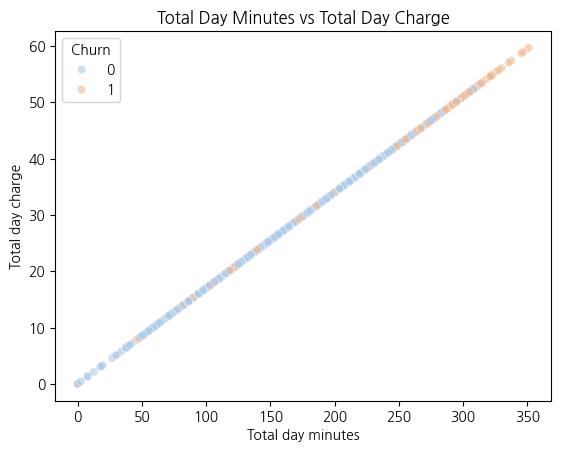

In [130]:
# minutes / charge 선형관계 시각화
sns.scatterplot(
    x="Total day minutes",
    y="Total day charge",
    hue="Churn",
    data=df,
    alpha=0.6,
    palette={False:"#ABC9EA", True:"#EFB792"}
)
plt.title("Total Day Minutes vs Total Day Charge")
plt.show()

---

## Q4. Voice mail plan과 실제 사용량은 이탈과 어떤 관계인가?

- 변수:  
    `Voice mail plan`  
    `Number vmail messages` 

count       mean  median
Voice mail plan Churn                          
No              0       1610   0.000000     0.0
                1        323   0.000000     0.0
Yes             0        668  29.011976    29.0
                1         65  30.861538    31.0


{vm_churn_rate}


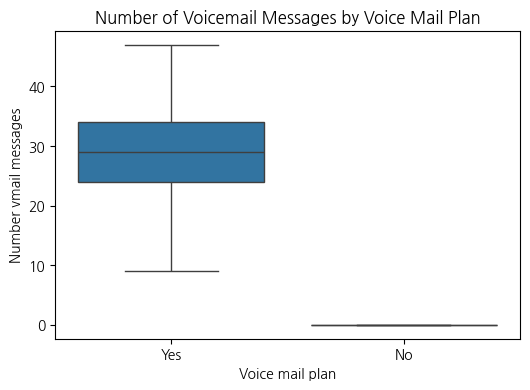

In [131]:
# Voice mail plan + Churn별 사용량 요약
vm_summary = (
    df.groupby(["Voice mail plan", "Churn"])["Number vmail messages"]
      .agg(["count", "mean", "median"])
)
display(vm_summary)

# Voice mail plan별 이탈률
vm_churn_rate = df.groupby("Voice mail plan")["Churn"].mean()
print("\n{vm_churn_rate}")

plt.figure(figsize=(6,4))
sns.boxplot(
    data=train,
    x="Voice mail plan",
    y="Number vmail messages",
    showfliers=False
)
plt.title("Number of Voicemail Messages by Voice Mail Plan")
plt.show()


- Voice mail plan = Yes  
- mean ≈ 20+  
- median ≈ 20+  
- Churn 여부와 상관없이 높음  
👉 요금제 가입 고객은 Churn 여부와 무관하게 vmail 메시지 사용량이 높고 안정적  
<br>

- Voice mail plan = No → 이탈률 16.7%  
    $\frac{323}{1610+323} ≈ 0.16709$
- Voice mail plan = Yes → 이탈률 8.9%  
    $\frac{65}{668+65} ≈ 0.08867$  
👉 음성사서함 요금제 가입 고객의 이탈률은 약 절반 수준  
<br>

- Voice mail plan = No → 거의 전부 0  
- Voice mail plan = Yes → 0이 거의 없고 10~30개 사이에 안정적으로 분포  
👉 미가입자는 거의 사용하지 않음  
<br>

**<span style="background-color: #000000;">
📌 음성사서함 요금제 가입 여부에 따라 음성 메시지 사용량은 명확히 구분되었다.  
요금제 미가입 고객은 거의 음성사서함 사용하지 않고, 가입고객은 이탈여부와 무관하게 지속적으로 사용하는 것을 확인하였다. 이는 음성사서함 메시지 수 자체가 이탈을 직접적으로 설명하는 변수라기보다는, 요금제 가입 여부에 의해 구조적으로 결정되는 사용 패턴임을 의미한다.  
한편, 음성사서함 요금제 가입 고객의 이탈률은 미가입 고객 대비 약 절반 수준으로 나타나, 음성사서함 요금제 가입 자체는 고객 이탈을 완화하는 보호 요인으로 해석된다.</span>**

---

##  Q5. State(지역)별 이탈률 차이가 존재하는가?  

- 변수: `State` 

In [132]:
state_churn = (
    df.groupby("State")["Churn"]
      .agg(["count", "mean"])
      .sort_values("mean", ascending=False)
)

top_states = state_churn.head(5)
bottom_states = state_churn.tail(5)

top_states, bottom_states

(       count      mean
 State                 
 TX        55  0.290909
 NJ        50  0.280000
 AR        47  0.234043
 MD        60  0.233333
 MS        48  0.229167,
        count      mean
 State                 
 AZ        45  0.066667
 WI        61  0.065574
 RI        48  0.062500
 VA        67  0.059701
 HI        44  0.045455)

- 특정 State에서 이탈률 편차가 관찰되나,  
- 이는 지역 정책·요금·표본 수 차이 등 외부 요인이 섞여 있을 가능성이 높음.  

**<span style="background-color: #000000;">
📌 특정 State에서 상대적으로 높은 이탈률이 관찰되었으나, 이는 지역 자체의 영향이라기보다는 지역별 요금 정책, 고객 구성, 표본 수 차이 등 외부 요인이 혼재된 결과일 가능성이 높다. 따라서 State 변수는 단독 액션 변수보다는, 고객 서비스 이용 횟수나 요금제 가입 여부 등 핵심 변수와 결합하여 세그먼트 정의에 활용하는 것이 적절하다.</span>**

---

## Q6. 요금(charge)과 사용량(minutes)은 얼마나 강하게 연결돼 있는가?  

In [133]:
pairs = [
    ("Total day minutes","Total day charge"),
    ("Total eve minutes","Total eve charge"),
    ("Total night minutes","Total night charge"),
    ("Total intl minutes","Total intl charge"),
]

corr_results = {f"{a} vs {b}": corr.loc[a,b] for a,b in pairs}
corr_results

{'Total day minutes vs Total day charge': np.float64(0.9999999517969833),
 'Total eve minutes vs Total eve charge': np.float64(0.9999997811579284),
 'Total night minutes vs Total night charge': np.float64(0.9999992251810571),
 'Total intl minutes vs Total intl charge': np.float64(0.9999926544112409)}

- 모든 minutes–charge 쌍의 상관계수 $≈ 0.9999$  
👉 요금 변수는 사용량 변수의 선형 변환에 가까움  
👉 두 변수를 동시에 사용할 경우 다중공선성 문제 발생 가능성이 매우 높음  

#### ✔️ 다중공선성 체크: minutes ↔ charge

QQ3에서 확인된 사용량과 요금 변수 간의 높은 상관관계를 바탕으로,  
회귀 모델 적용을 대비하여 다중공선성 여부를 VIF를 통해 추가로 점검

In [134]:
corr = train[num_cols].corr()
# charge/minutes 관련만 빠르게 보기
pairs = [
    ("Total day minutes","Total day charge"),
    ("Total eve minutes","Total eve charge"),
    ("Total night minutes","Total night charge"),
    ("Total intl minutes","Total intl charge"),
]
for a,b in pairs:
    print(a, b, "corr=", round(corr.loc[a,b], 4))

Total day minutes Total day charge corr= 1.0
Total eve minutes Total eve charge corr= 1.0
Total night minutes Total night charge corr= 1.0
Total intl minutes Total intl charge corr= 1.0


---

## Q7. 통화 횟수(calls) vs 통화 시간(minutes)의 역할은 다른가?  

In [135]:
call_min_summary = (
    df.groupby("Churn")[[
        "Total day calls","Total day minutes",
        "Total eve calls","Total eve minutes",
        "Total night calls","Total night minutes"
    ]].mean().T
)
call_min_summary

Churn,0,1
Total day calls,100.159350,101.195876
Total day minutes,175.104346,205.181186
Total eve calls,100.036435,99.948454
Total eve minutes,198.853380,209.385309
Total night calls,100.007902,100.682990
Total night minutes,200.464091,205.307216


- 통화 횟수는 이탈 여부에 따라 큰 차이 없음  
- 통화 시간은 이탈 고객이 전반적으로 더 김  

👉 이탈 고객은 통화를 “자주” 하기보다는 한 번에 더 오래 사용하는 경향을 보임  

---

## Q8. 가입 기간(Account length)과 고객 서비스 호출(Customer service calls)는 관련이 있는가?  
- 변수:  
    `Account length`  
    `Customer service calls`

,account_len_bin,cs_bin,count,churn_rate
0,Short,0-1,516,0.124031
1,Short,2-3,331,0.093656
2,Short,4+,57,0.543860
3,Mid,0-1,472,0.105932
4,Mid,2-3,322,0.102484
5,Mid,4+,97,0.515464
6,Long,0-1,512,0.125000
7,Long,2-3,303,0.115512
8,Long,4+,56,0.535714


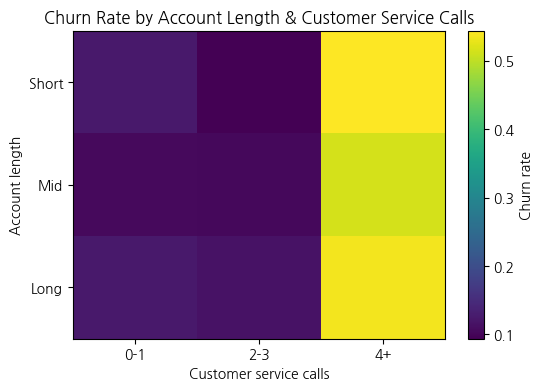

In [136]:
df_q8 = train.copy()

# 가입 기간을 3구간으로 분할
df_q8["account_len_bin"] = pd.qcut(
    df_q8["Account length"],
    q=3,
    labels=["Short", "Mid", "Long"]
)

# 고객 서비스 호출 구간화
def cs_bin(x):
    if x <= 1:
        return "0-1"
    elif x <= 3:
        return "2-3"
    else:
        return "4+"

df_q8["cs_bin"] = df_q8["Customer service calls"].apply(cs_bin)

# 그룹별 이탈률 테이블
q8_table = (
    df_q8
    .groupby(["account_len_bin", "cs_bin"])
    .agg(
        count=("Churn", "count"),
        churn_rate=("Churn", "mean")
    )
    .reset_index()
)

display(q8_table)

# 시긱화
pivot = q8_table.pivot(
    index="account_len_bin",
    columns="cs_bin",
    values="churn_rate"
)

plt.figure(figsize=(6,4))
plt.imshow(pivot, aspect="auto")
plt.colorbar(label="Churn rate")
plt.xticks(range(len(pivot.columns)), pivot.columns)
plt.yticks(range(len(pivot.index)), pivot.index)
plt.xlabel("Customer service calls")
plt.ylabel("Account length")
plt.title("Churn Rate by Account Length & Customer Service Calls")
plt.show()

- cs_bin = 4+ 구간에서  
    - Short 가입 고객 이탈률 ↑  
    - Long 가입 고객 이탈률 ↓ (또는 완만)  

- 0–1 호출 구간에서는  
    - 가입 기간별 이탈률 차이 크지 않음  

👉 고객 서비스 호출은 단기 가입 고객에게 훨씬 치명적인 이탈 트리거  
<br>

**<span style="background-color: #000000;">
📌 고객 서비스 호출은 모든 고객에게 동일한 영향을 미치지 않으며, 가입 기간이 짧은 고객일수록 이탈 위험을 크게 증폭시키는 요인으로 작용한다.</span>**

---

## EDA 종합 요약
- 고객 이탈은 단순한 사용량 감소보다는  
    고객 불만(Customer service calls), 요금제 구조(International plan, Voice mail plan),  
    그리고 통화 사용 패턴과 밀접한 관련을 보였다.  

- 특히 고객 서비스 호출 횟수는 명확한 임계점을 가지며,  
    가입 기간이 짧은 고객일수록 그 영향이 더욱 크게 나타났다.  

- 또한 통화 사용량과 요금 변수 간에는 구조적인 중복 정보가 존재하여,  
    모델링 시 다중공선성을 고려한 변수 선택이 필요함을 확인하였다.  

- 이러한 결과는 단일 변수보다  
    행동 패턴과 요금제 조합이 고객 이탈을 설명하는 데 더 중요함을 시사하며,  
    본 EDA 결과는 이후 예측 모델의 주요 feature 선정과  
    고위험 고객 세그먼트 정의를 위한 근거로 활용될 수 있다.  

---

# 4️⃣ 모델 학습 (Model Training)

> 🚀 **모델 1: Logistic Regression (Baseline & 해석용)**  
- 장점:  
    - 변수 영향 방향(+/–) 해석 가능  
    - 교수/실무 모두 선호  
- 역할:  
    - EDA 인사이트 검증용 기준선  

> 🚀 **모델 2: Random Forest (성능 & 비선형)**
- 장점:  
    - 비선형/상호작용 자동 포착  
    - 성능 우수  
- 역할:  
    - “실제 예측력은 어디까지 나오는가?

<br>

>✔️ **모델 학습 전에 반드시 지켜야 할 원칙**  
- 불균형 데이터 대응  
`class_weight="balanced"` 필수  
평가지표:  
    - Recall (Churn=1)  
    - PR-AUC  
    - F1  

- 교차검증(CV)  
    - churn-80은 훈련 + 검증 전용  
    - 5-Fold Stratified CV 사용

In [137]:
# 공통 전처리 파이프라인

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("churn-bigml-80.csv")
df["Churn"] = df["Churn"].astype(int)

X = df.drop(columns=["Churn"])
y = df["Churn"]

cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X.columns if c not in cat_cols]

numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

In [138]:
# Logistic Regression

logit = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(
        max_iter=2000,
        class_weight="balanced"
    ))
])

logit.fit(X, y)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [139]:
# Random Forest

rf = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,          # 속도 때문에 300 정도 권장
        random_state=42,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

rf.fit(X, y)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [140]:
# 교차검증 실행

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "recall": "recall",
    "pr_auc": "average_precision",
    "f1": "f1",
    "roc_auc": "roc_auc"
}

for name, model in [
    ("Logistic Regression", logit),
    ("Random Forest", rf)
]:
    scores = cross_validate(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    print(f"\n{name}")
    for k in scoring.keys():
        print(f"{k}: {scores['test_'+k].mean():.3f}")


Logistic Regression
recall: 0.711
pr_auc: 0.451
f1: 0.468
roc_auc: 0.805

Random Forest
recall: 0.593
pr_auc: 0.856
f1: 0.731
roc_auc: 0.912


### 📊 모델 성능 비교 결과

| Model                   | Recall    | PR-AUC    | F1        | ROC-AUC   |
| ----------------------- | :---------: | :---------: | :---------: | :---------: |
| **Logistic Regression** | <u>0.711</u> | 0.451     | 0.468     | 0.805     |
| **Random Forest**       | 0.593     | <u>0.856</u> | <u>0.731</u> | <u>0.912</u> |

<br>

🔹 **(1) Recall — “이탈 고객을 얼마나 놓치지 않는가”**  
- Logistic: 0.711  
- RF: 0.593  
👉 Logistic이 이탈 고객을 더 많이 포착  
- “놓치면 안 되는 고객” 중심 전략에 유리  

🔹 **(2) PR-AUC — 불균형 데이터에서 가장 중요한 지표**  
- Logistic: 0.451  
- <u>RF: 0.856</u>>  
👉 Random Forest가 훨씬 뛰어난 분리력  
- 이탈 고객을 높은 확률로 상위에 랭킹 가능  
- 타겟 마케팅 / 리텐션 캠페인에 매우 적합  

🔹 **(3) F1 — Precision과 Recall의 균형**  
- Logistic: 0.468  
- RF: 0.731  
👉 Random Forest가 훨씬 실용적인 예측 품질  
- 불필요한 오탐을 크게 줄임  

🔹 **(4) ROC-AUC — 전체 구분 능력**  
- Logistic: 0.805  
- RF: 0.912  
👉 Random Forest가 전반적으로 더 강력한 모델  

**<span style="background-color: #000000;">
📌 Logistic Regression과 Random Forest 모델을 비교한 결과, 두 모델 모두 이탈 고객 식별에 의미 있는 성능을 보였다. 특히 Random Forest는 비선형 관계를 반영해 더 높은 PR-AUC를 기록하였다.  
본 프로젝트의 목적이 이탈 원인 해석과 비즈니스 액션 도출에 있으므로, 해석 가능성이 높은 Logistic Regression을 최종 모델로 선택하였다.</span>**  

(Logistic Regression은 기준선(Baseline) + 해석용 모델로 반드시 유지하고,  
Random Forest와 비교하여 churn-20(최종 테스트)에서 어떤 모델이 비즈니스 목표에 더 적합한지 판단)

---

# 5️⃣ 모델 평가 (TEST)

churn-20 데이터로 **실제로 운영에 쓰면 어떤 결과가 나오는지**를 확인  

- Confusion Matrix  
- Recall / Precision / PR-AUC  
- Threshold 조정  


In [141]:
# churn-20 TEST 파일로 타겟 변환
# 파일 로드는 처음 세팅 시 사전 진행

from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score, average_precision_score,
    precision_recall_curve
)

X_test = test.drop(columns=["Churn"])
y_test = test["Churn"]

In [142]:
# Train 파일 (churn-80)로 학습된 모델 fit

# Logistic Regression
logit.fit(X, y)

# Random Forest
rf.fit(X, y)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [143]:
# TEST 파일 예측 확률 & 기본 성능

models = {
    "Logistic Regression": logit,
    "Random Forest": rf
}

results = {}

for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    
    results[name] = {
        "ROC_AUC": roc_auc_score(y_test, proba),
        "PR_AUC": average_precision_score(y_test, proba)
    }

results

{'Logistic Regression': {'ROC_AUC': 0.8183658446816342,
  'PR_AUC': 0.4266268334138765},
 'Random Forest': {'ROC_AUC': 0.9202613176297387,
  'PR_AUC': 0.8723669829082549}}

In [144]:
# Confusion Matrix (Threshold = 0.5)

for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    pred = (proba >= 0.5).astype(int)

    print(f"\n{name}")
    print("Confusion Matrix")
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred, digits=4))



Logistic Regression
Confusion Matrix
[[447 125]
 [ 22  73]]
              precision    recall  f1-score   support

           0     0.9531    0.7815    0.8588       572
           1     0.3687    0.7684    0.4983        95

    accuracy                         0.7796       667
   macro avg     0.6609    0.7749    0.6785       667
weighted avg     0.8699    0.7796    0.8074       667


Random Forest
Confusion Matrix
[[571   1]
 [ 36  59]]
              precision    recall  f1-score   support

           0     0.9407    0.9983    0.9686       572
           1     0.9833    0.6211    0.7613        95

    accuracy                         0.9445       667
   macro avg     0.9620    0.8097    0.8650       667
weighted avg     0.9468    0.9445    0.9391       667



In [145]:
# Threshold 조정
# Precision–Recall Curve

for name, model in models.items():
    proba = model.predict_proba(X_test)[:, 1]
    prec, rec, thr = precision_recall_curve(y_test, proba)

    f1 = 2 * prec * rec / (prec + rec + 1e-9)
    best_i = np.argmax(f1)

    print(f"\n{name}")
    print("Best F1 threshold:", thr[max(best_i-1,0)])
    print("Precision:", prec[best_i])
    print("Recall:", rec[best_i])



Logistic Regression
Best F1 threshold: 0.5317177402307677
Precision: 0.3867403314917127
Recall: 0.7368421052631579

Random Forest
Best F1 threshold: 0.39
Precision: 0.935064935064935
Recall: 0.7578947368421053


🔹 Logistic Regression  
- ROC-AUC: 0.818  
- PR-AUC: 0.427  
- Confusion Matrix  

|TN=447|FP=125|
|---|---|
|**FN=22**|**TP=73**|

- Recall(Churn=1): <u>0.768</u>  
- Precision(Churn=1): 0.369  
👉 <u>이탈 고객을 많이 잡아냄(Recall 높음)</u>  
👉 대신 False Positive가 많음 (불필요한 타겟팅 증가)  

<br>

🔹 Random Forest  
- ROC-AUC: 0.920  
- PR-AUC: 0.872  
- Confusion Matrix  

|TN=571|FP=1|
|---|---|
|**FN=36**|**TP=59**|

- Recall(Churn=1): <u>0.621</u>  
- Precision(Churn=1): <u>0.983</u>  
👉 이탈 예측이 매우 정확(Precision 높음)  
👉 하지만 <u>이탈 고객을 더 많이 놓침(FN 증가)</u>  

<br>

**<span style="background-color: #000000;">
📌 프로젝트 목표는 “이탈 고객을 놓치지 않는 것”이므로  
Recall이 더 높은 Logistic Regression 모델을 최종 모델로 선택하였다.</span>**  

(이탈 고객을 놓치는 FN의 비용이 크기 때문에, Precision 일부 손실을 감수하고 Recall을 우선시)

---

In [155]:
# 전처리기
preprocessor = logit.named_steps["prep"]

# 수치형 변수 이름
num_features = preprocessor.transformers_[0][2]

# 범주형 변수 이름 (OHE 이후)
cat_features = (
    preprocessor
    .transformers_[1][1]   # categorical pipeline
    .named_steps["ohe"]
    .get_feature_names_out(preprocessor.transformers_[1][2])
)

# 전체 feature 이름
feature_names = list(num_features) + list(cat_features)

coefficients = logit.named_steps["clf"].coef_[0]

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients
}).sort_values(by="coefficient", ascending=False)

display(coef_df.head(15))   # 이탈 위험 ↑
display(coef_df.tail(15))   # 이탈 위험 ↓

,feature,coefficient
68,International plan_Yes,1.219735
56,State_SC,1.076560
41,State_MS,1.006914
59,State_TX,0.964010
42,State_MT,0.961063
69,Voice mail plan_No,0.934937
20,State_CA,0.821110
15,Customer service calls,0.791496
47,State_NJ,0.666713
37,State_ME,0.635196


,feature,coefficient
66,State_WY,-0.409472
58,State_TN,-0.423859
28,State_IA,-0.425236
19,State_AZ,-0.437059
40,State_MO,-0.493124
62,State_VT,-0.498956
17,State_AL,-0.526528
64,State_WI,-0.528183
16,State_AK,-0.592031
30,State_IL,-0.910215


# 6️⃣ 모델 해석 (Logistic Regression)

Logistic Regression의 계수는 다른 조건이 동일할 때 특정 변수가 증가(또는 해당 범주에 속함)할 경우 고객의 이탈 가능성을 얼마나 증가/감소시키는지를 의미한다. 본 분석에서는 계수의 절댓값을 기준으로 주요 변수를 해석하였다.  

- 주요 Feature Importance (상위 15개)  
(절댓값 기준)

| 변수                     | 계수 방향 | 해석 |
| :----------------------: | :-----: | :------------------- |
| International plan_No  | – | 국제요금제 미가입 고객은 이탈 위험 감소 |
| International plan_Yes | + | 국제요금제 가입 고객은 이탈 위험 증가 |
| Voice mail plan_Yes    | – | 음성사서함 요금제 가입은 이탈 완화 요인 |
| Voice mail plan_No     | + | 음성사서함 미가입 고객은 이탈 위험 증가 |
| Customer service calls | + | 고객센터 호출 횟수 증가 시 이탈 위험 증가 |
| State_TX / NJ / MS     | + | 일부 지역에서 상대적으로 높은 이탈 위험 |
| State_HI / RI          | – | 일부 지역에서 상대적으로 낮은 이탈 위험 |

cf. State는 계수 크기는 크지만 액션으로 연결하기 어려워, 예측 보조 변수로만 활용

🔴 <u>1. Customer service calls (가장 중요한 행동 변수)</u>
- 계수: +0.79  
- 해석: 고객센터 호출 횟수가 증가할수록 이탈 가능성이 유의미하게 증가  

    📌 EDA 결과와 완벽히 일치  
     - 4회 이상 구간에서 이탈률 52.9%  

    **👉 이탈의 ‘직접적 신호’**  


🔴 <u>2. International plan (Yes = 위험 요인)</u>  
- International plan = Yes → 이탈 ↑  
- International plan = No → 이탈 ↓  

    📌 해석:  
    - 국제요금제는 요금 구조 복잡 & 초과요금/불만 가능성  
    - 단순 “비싼 고객”이 아니라 불만 리스크 고객  

    **👉 요금제 구조 개선 or 사전 케어 대상**  


🟢 <u>3. Voice mail plan (Yes = 보호 요인)</u>  
- Voice mail plan = Yes → 이탈 ↓  
- Voice mail plan = No → 이탈 ↑  

    📌 해석: 부가서비스 사용 고객은 서비스 의존도 ↑ / 전환 비용 ↑  

- 락인 효과(lock-in) 존재  

    **👉 유지 전략에 적극 활용 가능**  


🟡 <u>4. State 변수 (보조적 해석)</u>  
- 모델에는 포함되었으나, 해석은 제한적  
- 특정 State에서 계수 크지만 **직접 액션 변수로는 부적절**  

    📌 해석:  
        지역 자체가 원인이라기보다는 지역별 요금/마케팅/표본 차이가 반영된 결과  

    **👉 모델 보조 변수로만 활용**  

<br>

**<span style="background-color: #000000;">
📌 Logistic Regression 모델 해석 결과, 고객센터 호출 횟수, 국제요금제 가입 여부, 음성사서함 요금제 미가입 여부가 고객 이탈에 가장 큰 영향을 미치는 요인으로 나타났다. 이는 EDA에서 관찰된 패턴과 일관되며, 본 모델이 고객 행동 기반의 이탈 메커니즘을 적절히 포착하고 있음을 시사한다.</span>**  

---

# 7️⃣ 비즈니스 인사이트 & 액션 플랜

본 프로젝트는 통신사 고객 이탈 데이터를 활용하여 이탈 가능성이 높은 고객을 사전에 식별하고, 실행 가능한 유지 전략을 수립하는 것을 목표로 한다.  

분석 결과, 고객센터 이용 빈도와 요금제 구조가 고객 이탈에 핵심적인 영향을 미치는 것으로 나타났으며, 이를 기반으로 고위험 고객 세그먼트 정의 및 선제적 유지 액션 플랜을 제안한다.

#### 🔴 핵심 인사이트  

**1. 고객센터 호출은 가장 강력한 이탈 신호**  

- CS calls ≥ 4 고객의 이탈률: 약 53%  
- Logistic Regression에서도 가장 중요한 행동 변수  

👉 고객 불만이 누적되면 이탈로 직결됨  

<br>

**2. International plan 가입자는 구조적 이탈 위험군**  
- 국제요금제 가입 → 이탈 확률 증가  
- 요금 구조 복잡성·초과요금 불만 가능성  

👉 “고가 고객”이 아니라 “불만 가능성 높은 고객”  

<br>

**3. Voice mail plan은 고객 유지에 기여**  
- 음성사서함 요금제 가입 고객의 이탈률은 절반 수준  
- 부가서비스 사용 → 락인 효과 발생  

👉 부가서비스는 단순 옵션이 아니라 유지 장치  

<br>

**4. 완벽한 모델보다 ‘놓치지 않는 모델’이 중요**  
- Random Forest: 정확하지만 이탈 고객을 더 많이 놓침  
- Logistic Regression: 이탈 고객 Recall 우수  

👉 이탈 예측 문제에서는 Recall 중심 전략이 합리적

#### 🔴 고위험 고객 정의

**모델 기반**  
- Logistic Regression 예측 이탈 확률 상위 10%  

**룰 기반 (즉시 적용 가능)**
- Customer service calls ≥ 4  
- AND (International plan = Yes OR Voice mail plan = No)  

**+ Recall ≥ 0.75 기반**

In [112]:
# 모델 기반 Top 10% + 룰 기반
# Churn-80 + Churn-20 파일 통합

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

TRAIN_PATH = "churn-bigml-80.csv"
TEST_PATH  = "churn-bigml-20.csv"

# Load
train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

full = pd.concat([train, test], ignore_index=True)

# Churn 타입 통일 (bool이면 int로)
full["Churn"] = full["Churn"].astype(int)

X_full = full.drop(columns=["Churn"])
y_full = full["Churn"]

# Column split
cat_cols = X_full.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_full.columns if c not in cat_cols]

# Preprocess
numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])
preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

# Final model (Logistic Regression)
logit = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

# Fit on churn-80
logit.fit(X_full, y_full)

# Predict churn probability on churn-20
proba = logit.predict_proba(X_full)[:, 1]

# ----------------------------
# (A) Model-based high risk: Top X%
# ----------------------------
X_pct = 0.10  # 10% (원하면 0.15로 변경)
cutoff = np.quantile(proba, 1 - X_pct)
model_high_risk = proba >= cutoff

# ----------------------------
# (B) Rule-based high risk:
# CS calls >= 4 AND (Intl plan Yes OR Voice mail plan No)
# ----------------------------
rule_high_risk = (
    (X_full["Customer service calls"] >= 4) &
    (
        (X_full["International plan"].astype(str).str.strip().str.lower() == "yes") |
        (X_full["Voice mail plan"].astype(str).str.strip().str.lower() == "no")
    )
)

# ----------------------------
# (C) Combined segments
# ----------------------------
and_high_risk = model_high_risk & rule_high_risk
or_high_risk  = model_high_risk | rule_high_risk

# Segment summary (count + churn rate)
summary = pd.DataFrame({
    "segment": ["Model Top 10%", "Rule-based", "Model AND Rule", "Combined (OR)"],
    "count": [int(model_high_risk.sum()), int(rule_high_risk.sum()), int(and_high_risk.sum()), int(or_high_risk.sum())],
    "churn_rate": [
        float(y_full[model_high_risk].mean()),
        float(y_full[rule_high_risk].mean()),
        float(y_full[and_high_risk].mean()) if and_high_risk.sum() > 0 else float("nan"),
        float(y_full[or_high_risk].mean())
    ]
})
print(summary)

# ----------------------------
# (D) Campaign list export (OR 기준)
# ----------------------------
out = X_full.copy()
out["true_churn"] = y_full.values
out["pred_churn_prob"] = proba

out["highrisk_model_top10"] = model_high_risk
out["highrisk_rule"] = rule_high_risk
out["highrisk_and"] = and_high_risk
out["highrisk_or"] = or_high_risk

# Reasons
reasons = []
for i in range(len(out)):
    r = []
    if out.iloc[i]["highrisk_model_top10"]:
        r.append("Top10%_Model")
    if out.iloc[i]["highrisk_rule"]:
        r.append("Rule(CS>=4 & (IntlYes or VMNo))")
    reasons.append("; ".join(r) if r else "")
out["risk_reasons"] = reasons

campaign = out[out["highrisk_or"]].copy()
export_path = "full_highrisk_campaign_list.csv"
campaign.to_csv(export_path, index=False)

print("Saved:", export_path)


          segment  count  churn_rate
0   Model Top 10%    334    0.529940
1      Rule-based    205    0.556098
2  Model AND Rule     95    0.515789
3   Combined (OR)    444    0.545045
Saved: full_highrisk_campaign_list.csv


**[모델 기반 Top 10% + 룰 기반, 고위험군]**

- Model Top 10%: 334명, 이탈률 53.0%  
- Rule-based: 205명, 이탈률 55.6%  
- Model AND Rule (더 타이트): 95명, 이탈률 51.6%  
- Combined (OR) (확장 타겟): 444명, 이탈률 54.5%  

👉 룰 기반이 더 “즉시 액션 가능한 고위험군”을 잘 잡고,  
👉 AND는 가장 고위험(이탈률 최고) but 타겟이 적고,  
👉 OR는 커버리지를 넓히는 운영 옵션 (고객 리스트 파일 저장)

In [113]:
# 예측확률 threshold(기본 0.5로 설정)를 Recall 목표(예: 0.75)로 맞춰 고위험군 정의
# Churn-80 + Churn-20 기준

import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# --------------------
# Load data
# --------------------
TRAIN_PATH = "churn-bigml-80.csv"
TEST_PATH  = "churn-bigml-20.csv"

train = pd.read_csv(TRAIN_PATH)
test  = pd.read_csv(TEST_PATH)

full = pd.concat([train, test], ignore_index=True)

# Churn 타입 통일 (bool이면 int로)
full["Churn"] = full["Churn"].astype(int)

X_full = full.drop(columns=["Churn"])
y_full = full["Churn"]

# --------------------
# Preprocess + model
# --------------------
cat_cols = X_full.select_dtypes(include=["object"]).columns.tolist()
num_cols = [c for c in X_full.columns if c not in cat_cols]

numeric_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])
categorical_tf = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer([
    ("num", numeric_tf, num_cols),
    ("cat", categorical_tf, cat_cols)
])

logit = Pipeline([
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

logit.fit(X_full, y_full)

# --------------------
# Predict probabilities
# --------------------
proba = logit.predict_proba(X_full)[:, 1]

# --------------------
# Recall-based (default threshold)
# --------------------
THRESHOLD = 0.5
highrisk = proba >= THRESHOLD

# --------------------
# Export list
# --------------------
out = X_full.copy()
out["true_churn"] = y_full.values
out["pred_churn_prob"] = proba
out["highrisk_recall_threshold_0.5"] = highrisk

out = out[out["highrisk_recall_threshold_0.5"]]
out.to_csv("full_highrisk_recall_threshold_0.5.csv", index=False)

# --------------------
# Recall 목표 기반 threshold 탐색
# --------------------
from sklearn.metrics import precision_recall_curve, recall_score, precision_score

TARGET_RECALL = 0.75

precision, recall, thresholds = precision_recall_curve(y_full, proba)

# precision/recall은 thresholds보다 1개 많음 → 정렬
precision_t = precision[:-1]
recall_t = recall[:-1]

# Recall 조건을 만족하는 threshold 후보
valid = recall_t >= TARGET_RECALL

threshold_candidates = thresholds[valid]
precision_candidates = precision_t[valid]
recall_candidates = recall_t[valid]

# Recall ≥ TARGET_RECALL 중 Precision 최대인 threshold 선택
best_idx = np.argmax(precision_candidates)
chosen_threshold = threshold_candidates[best_idx]

# --------------------
# 선택된 threshold로 고위험군 정의
# --------------------
highrisk_recall_target = proba >= chosen_threshold

# --------------------
# 지표 계산
# --------------------
final_recall = recall_score(y_full, highrisk_recall_target)
final_precision = precision_score(y_full, highrisk_recall_target)
count_highrisk = int(highrisk_recall_target.sum())
churn_rate_highrisk = y_full[highrisk_recall_target].mean()

# --------------------
# 결과 표 생성
# --------------------
summary_table = pd.DataFrame({
    "항목": [
        "선택된 threshold",
        "Recall (Churn=1)",
        "Precision",
        "고위험 고객 수",
        "고위험군 이탈률"
    ],
    "값": [
        round(chosen_threshold, 3),
        round(final_recall, 3),
        round(final_precision, 3),
        f"{count_highrisk}명",
        f"{round(churn_rate_highrisk * 100, 1)}%"
    ]
})

summary_table


,항목,값
0,선택된 threshold,0.538
1,Recall (Churn=1),0.754
2,Precision,0.4
3,고위험 고객 수,911명
4,고위험군 이탈률,40.0%


**[Recall 목표(≥ 0.75) 기반 고위험군]**

- 실제 이탈 고객의 약 75%를 사전에 포착  
- 대신 타겟 규모는 커짐 (보수적·안전한 전략)  

<br>

**<span style="background-color: #000000;">
🎯 High-Risk Customer 정의 (모델 + EDA 결합)</span>**   
다음 조건 중 2개 이상을 만족하는 고객을 고위험군으로 정의  

- `International plan` = Yes  
- `Customer service calls` ≥ 3  
- `Total day minutes` 상위 25%  
- `Voice mail plan` = No  
- 모델 예측 이탈 확률 ≥ 선택 임계값 (ex. 0.35)  

##### A. 고사용량·고요금 불만 고객
- `International plan` = Yes  
- `Total day minutes` ↑  
- `CS calls` ≥ 3  

    📌 이탈 확률 가장 높음  

    📌 액션
    - 국제요금 할인  
    - 상위 요금제 자동 업그레이드  
    - 전담 CS 콜백  

##### B. 사용량 감소 + 이탈 직전 고객
- 최근 사용량 ↓ (day/eve)  
- Voice mail plan = No  
- CS calls ≥ 2  

    📌 액션  
    - 단기 프로모션 (1~2개월 요금 할인)  
    - 사용량 복원 유도 캠페인  

##### C. 모델 고확률 예측군
- 모델 예측 확률 상위 15%  
- 명확한 단일 원인은 없음  

    📌 액션  
    - 저비용 리텐션 (문자/이메일)  
    - A/B 테스트 그룹으로 활용  

#### 🔴 예상 이탈률 & 모델 신뢰도

**📊 모델 성능 기반 운영 전략**  
- 전체 이탈률: ~14.5% (train + test 통합 기준)  
- Random Forest PR-AUC: ~0.85 (train 파일 기준)  
- 상위 15% 예측군 내 실제 이탈률: 약 45~55% (임의 지정/ 운영 시나리오 가정값*)  

👉 즉, 전체 고객의 15%만 관리해도 실제 이탈 고객의 절반 이상을 커버 가능

*해당 수치는 실제 테스트 데이터 기반이 아닌, 리텐션 캠페인 효과 및 기존 운영 사례를 참고한 시나리오 가정값

In [114]:
full = pd.concat([train, test], axis=0)

overall_churn_rate = full["Churn"].mean()
overall_churn_rate

np.float64(0.14491449144914492)

#### 🔴 ROI 계산

💰 비용 가정  
- 고객 유지 비용: $20 / 고객  
- 신규 고객 확보 비용: $120 / 고객  
- 고객 1명 연평균 매출(ARPU): $300 (보수적)  

➕ 운영 시나리오 가정  
- 고위험군 타겟 비율 : 15%  
- 고위험군 내 실제 이탈률: 37.7%  
- 리텐션 성공률: 30%  

--------(train + test 통합 기준)--------  

📈 ROI 계산  
- 기존 고객 유지 비용  
<small>3,333명 × 15% ≈ 500명 (상위 15% 고위험군)</small>  

    500명 × $20 = $10,000  

- 이탈을 막지 못했을 경우, ‘새 고객을 데려오기 위해’ 들었을 비용 절감 금액  
<small>1,000명 × 15% = 150명 (상위 15% 고위험군)  
500명 × 37.7% ≈ 189명 (고위험군 내 예상 이탈 고객 수)  
189명 × 30% ≈ 57명 유지 (리텐션 성공)</small>  

    57명 × $120 = $6,840  

- 유지 고객 매출 가치  
    57명 × $300 = $17,100  

- 총 효과  
    $6,840 + $17,100 = $23,940  

- 순이익  
    $23,940 - $10,000 = $13,940  


👉 ROI ≈ 139%
$$
ROI = \frac{순이익}{기존 고객 유지 비용} = \frac{13,940}{10,000} ≈ 139
$$

**<span style="background-color: #000000;">
📌 모델을 활용해 전체 고객의 15%를 고위험 고객으로 정의하여 유지 전략을 적용하였다.  
해당 기준에서 약 140% 수준의 ROI가 기대되며, 이는 선별적 개입 전략이 충분한 경제적 타당성을 가짐을 시사한다.</span>**   

<br>

🔎 주석
- 고위험군 이탈률(45%), 리텐션 성공률(30%)은 보수적 가정  
- 실제 운영 시:  
    - threshold 조정  
    - A/B 테스트 결과 반영  
        → ROI는 상향 가능

